In [35]:
from datetime import datetime, timedelta
import pandas as pd 
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import yfinance as yf
yf.pdr_override()
import mplfinance as mpf

In [36]:
#trainデータ
start = '2016-01-03'
end = '2022-01-01'

df = data.get_data_yahoo('^N225', start, end)
df.to_csv('finance_dataset.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
#テストデータ
start = '2022-01-03'
end = '2023-01-01'

df = data.get_data_yahoo('^N225', start, end)
df.to_csv('finance_dataset.csv')

[*********************100%***********************]  1 of 1 completed


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1466 entries, 2016-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1466 non-null   float64
 1   High       1466 non-null   float64
 2   Low        1466 non-null   float64
 3   Close      1466 non-null   float64
 4   Adj Close  1466 non-null   float64
 5   Volume     1466 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.2 KB


In [38]:
#df=pd.read_csv('finance_dataset.csv')

In [39]:
df_a = pd.read_csv('finance_dataset.csv')
df_a

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,18818.580078,18951.119141,18394.429688,18450.980469,18450.980469,140200000
1,2016-01-05,18398.759766,18547.380859,18327.519531,18374.000000,18374.000000,132300000
2,2016-01-06,18410.570312,18469.380859,18064.300781,18191.320312,18191.320312,142200000
3,2016-01-07,18139.769531,18172.039062,17767.339844,17767.339844,17767.339844,168000000
4,2016-01-08,17562.230469,17975.310547,17509.640625,17697.960938,17697.960938,184300000
...,...,...,...,...,...,...,...
1461,2021-12-24,28836.050781,28870.130859,28773.500000,28782.589844,28782.589844,35900000
1462,2021-12-27,28786.330078,28805.279297,28658.820312,28676.460938,28676.460938,37500000
1463,2021-12-28,28953.320312,29121.009766,28879.679688,29069.160156,29069.160156,47000000
1464,2021-12-29,28995.730469,29106.279297,28729.609375,28906.880859,28906.880859,44700000


In [40]:
df_a['Date'] = pd.to_datetime(df_a['Date'])
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1466 non-null   datetime64[ns]
 1   Open       1466 non-null   float64       
 2   High       1466 non-null   float64       
 3   Low        1466 non-null   float64       
 4   Close      1466 non-null   float64       
 5   Adj Close  1466 non-null   float64       
 6   Volume     1466 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 80.3 KB


In [41]:
df_b = pd.read_csv('finance_dataset.csv')
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1466 non-null   object 
 1   Open       1466 non-null   float64
 2   High       1466 non-null   float64
 3   Low        1466 non-null   float64
 4   Close      1466 non-null   float64
 5   Adj Close  1466 non-null   float64
 6   Volume     1466 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.3+ KB


In [42]:
b = df_b['Date']

In [43]:
df_shift = df.shift(-1)
df['delta_Close'] = df_shift['Close'] - df_shift['Open']
df

,Open,High,Low,Close,Adj Close,Volume,delta_Close
Date,,,,,,,
2016-01-04,18818.580078,18951.119141,18394.429688,18450.980469,18450.980469,140200000,-24.759766
2016-01-05,18398.759766,18547.380859,18327.519531,18374.000000,18374.000000,132300000,-219.250000
2016-01-06,18410.570312,18469.380859,18064.300781,18191.320312,18191.320312,142200000,-372.429688
2016-01-07,18139.769531,18172.039062,17767.339844,17767.339844,17767.339844,168000000,135.730469
2016-01-08,17562.230469,17975.310547,17509.640625,17697.960938,17697.960938,184300000,-251.968750
...,...,...,...,...,...,...,...
2021-12-24,28836.050781,28870.130859,28773.500000,28782.589844,28782.589844,35900000,-109.869141
2021-12-27,28786.330078,28805.279297,28658.820312,28676.460938,28676.460938,37500000,115.839844
2021-12-28,28953.320312,29121.009766,28879.679688,29069.160156,29069.160156,47000000,-88.849609


In [44]:
df['UP'] = 0
df['UP'] [df['delta_Close'] > 0] = 1
df = df.drop('delta_Close', axis=1)
df

,Open,High,Low,Close,Adj Close,Volume,UP
Date,,,,,,,
2016-01-04,18818.580078,18951.119141,18394.429688,18450.980469,18450.980469,140200000,0
2016-01-05,18398.759766,18547.380859,18327.519531,18374.000000,18374.000000,132300000,0
2016-01-06,18410.570312,18469.380859,18064.300781,18191.320312,18191.320312,142200000,0
2016-01-07,18139.769531,18172.039062,17767.339844,17767.339844,17767.339844,168000000,1
2016-01-08,17562.230469,17975.310547,17509.640625,17697.960938,17697.960938,184300000,0
...,...,...,...,...,...,...,...
2021-12-24,28836.050781,28870.130859,28773.500000,28782.589844,28782.589844,35900000,0
2021-12-27,28786.330078,28805.279297,28658.820312,28676.460938,28676.460938,37500000,1
2021-12-28,28953.320312,29121.009766,28879.679688,29069.160156,29069.160156,47000000,0


In [45]:
df['UP'][5]

1

In [46]:
b

0       2016-01-04
1       2016-01-05
2       2016-01-06
3       2016-01-07
4       2016-01-08
           ...    
1461    2021-12-24
1462    2021-12-27
1463    2021-12-28
1464    2021-12-29
1465    2021-12-30
Name: Date, Length: 1466, dtype: object

In [47]:
len(b)-21

1445

In [48]:
#トレーニングデータの作成
for i in range(len(b)-21):
    macd = (
       df[i:i+21].Close.ewm(span=12).mean()
       - df[i:i+21].Close.ewm(span=26).mean()
    )
    signal = macd.ewm(span=9).mean()
    add_plot = [
       mpf.make_addplot(macd, panel = 1, secondary_y = False, ylabel = "MACD"),
       mpf.make_addplot(signal, panel = 1, secondary_y = False),
       mpf.make_addplot(macd - signal, type = "bar", color = "g", panel = 1, secondary_y = True)
    ]
    mpf.plot(df[i:i+21], type='candle', volume=True, volume_panel = 2, addplot = add_plot, savefig= fr'train_8\5days\{b[i]}.jpg')

In [ ]:
#テストデータの作成
for i in range(len(b)-21):
    macd = (
       df[i:i+21].Close.ewm(span=12).mean()
       - df[i:i+21].Close.ewm(span=26).mean()
    )
    signal = macd.ewm(span=9).mean()
    add_plot = [
       mpf.make_addplot(macd, panel = 1, secondary_y = False, ylabel = "MACD"),
       mpf.make_addplot(signal, panel = 1, secondary_y = False),
       mpf.make_addplot(macd - signal, type = "bar", color = "g", panel = 1, secondary_y = True)
    ]
    mpf.plot(df[i:i+21], type='candle', volume=True, volume_panel = 2, addplot = add_plot, savefig= fr'test_8\5days\{b[i]}.jpg')

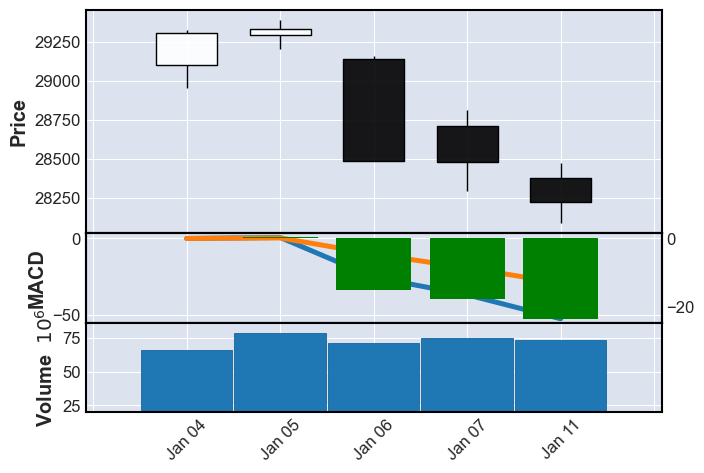

In [34]:
for i in range(1):
    macd = (
       df[i:i+5].Close.ewm(span=12).mean()
       - df[i:i+5].Close.ewm(span=26).mean()
    )
    signal = macd.ewm(span=9).mean()
    add_plot = [
       mpf.make_addplot(macd, panel = 1, secondary_y = False, ylabel = "MACD"),
       mpf.make_addplot(signal, panel = 1, secondary_y = False),
       mpf.make_addplot(macd - signal, type = "bar", color = "g", panel = 1, secondary_y = True)
    ]
    mpf.plot(df[i:i+5], type='candle', volume=True, volume_panel = 2, addplot = add_plot)